<a href="https://colab.research.google.com/github/Kailunwrites/Kaggle-Machine-Learning-Housing-Project-/blob/master/kailun_cheng/Housing_Prices_ML_Feature_Engineering_Train_Test_Encode_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kailun Section Categorical Only

##Load Data and Import Libs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [4]:
cd /content/drive/My\ Drive/Data Science Bootcamp 2019 /Housing_Project/

/content/drive/My Drive/Data Science Bootcamp 2019 /Housing_Project


In [5]:
ls

 DataExploration_jah.ipynb
'Housing Prices ML_Feature Engineering_Train_Test_Encode_all.ipynb'
 test.csv
 train1.csv
 train.csv


In [0]:
datadir = r'/content/drive/My\ Drive/Data Science Bootcamp 2019 /Housing_Project/'

In [0]:
filename= r'train.csv'
filename2= r'test.csv'
train_data = pd.read_csv(filename)
test_data = pd.read_csv(filename2)

In [0]:
test_data= pd.DataFrame(test_data)

##Examine Data (Make sure data loaded correctly)

In [0]:
#train_data.drop("Id", 1, inplace=True)  # remove ID column because useless
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
#test_data.drop("Id", 1, inplace=True)  # remove ID column
test_data.head()  # exactly the same features 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Kailun Data Description and comments 



BsmtCond: Evaluates the general condition of the basement   

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

#########################################################

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


## Response Variable  (+ transformation)



visualize the log transform of the response variable.  Log transform able to normalize the response variable 

In [0]:
train_data['SalePrice_log']= np.log(train_data['SalePrice'])

##Categorical Indep. Variables All data cleaning train



In [24]:
cat_var_all= ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
              'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
              'PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition', 'SalePrice_log', 'SalePrice']
len(cat_var_all)  #should return 24

24

In [0]:
train_data_cat_var= pd.DataFrame(train_data, columns=cat_var_all)
test_data_cat_var= pd.DataFrame(test_data, columns=cat_var_all).drop(['SalePrice_log', 'SalePrice'], axis=1)

In [26]:
train_data_cat_var.sample(10)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice_log,SalePrice
1011,NaN,NaN,NaN,NaN,NaN,GasA,TA,N,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal,11.512925,100000
1328,Gd,TA,No,LwQ,Unf,GasW,Ex,Y,SBrkr,TA,Mod,TA,Detchd,Unf,Fa,TA,Y,NaN,MnPrv,Shed,WD,Normal,12.452933,256000
234,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,12.285346,216500
863,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,11.794338,132500
744,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,12.100712,180000
173,TA,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,COD,Normal,12.001505,163000
263,TA,TA,No,LwQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,11.775290,130000
11,Ex,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial,12.751300,345000
354,TA,TA,No,LwQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,11.849398,140000
205,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,12.103486,180500


### Null columns? or NA?

In [27]:
train_data_cat_var.info()  #initial info with all null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     1423 non-null object
BsmtFinType2     1422 non-null object
Heating          1460 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
Electrical       1459 non-null object
KitchenQual      1460 non-null object
Functional       1460 non-null object
FireplaceQu      770 non-null object
GarageType       1379 non-null object
GarageFinish     1379 non-null object
GarageQual       1379 non-null object
GarageCond       1379 non-null object
PavedDrive       1460 non-null object
PoolQC           7 non-null object
Fence            281 non-null object
MiscFeature      54 non-null object
SaleType         1460 non-null object
SaleCondition    1460 non-null object
SalePrice_log    1460 non-null float64
SalePrice        1460 non

In [28]:
test_data_cat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 22 columns):
BsmtQual         1415 non-null object
BsmtCond         1414 non-null object
BsmtExposure     1415 non-null object
BsmtFinType1     1417 non-null object
BsmtFinType2     1417 non-null object
Heating          1459 non-null object
HeatingQC        1459 non-null object
CentralAir       1459 non-null object
Electrical       1459 non-null object
KitchenQual      1458 non-null object
Functional       1457 non-null object
FireplaceQu      729 non-null object
GarageType       1383 non-null object
GarageFinish     1381 non-null object
GarageQual       1381 non-null object
GarageCond       1381 non-null object
PavedDrive       1459 non-null object
PoolQC           3 non-null object
Fence            290 non-null object
MiscFeature      51 non-null object
SaleType         1458 non-null object
SaleCondition    1459 non-null object
dtypes: object(22)
memory usage: 250.9+ KB


#### Bsmt related 
Replace null with NA 

if BsmtQual!=null & BsmtCond!= null & BsmtExposure==null:
  BsmtExposure= No


In [0]:
#mask=train_data_cat_var['BsmtCond'].isnull()
#obtain the index with the rows that are null 
# make sure all of the no Bsmt houses line up 
bsmt_null_list=np.array(train_data_cat_var['BsmtCond'][train_data_cat_var['BsmtCond'].isnull()].index)
bsmt_null_list2=np.array(train_data_cat_var['BsmtQual'][train_data_cat_var['BsmtQual'].isnull()].index)
bsmt_null_list3=np.array(train_data_cat_var['BsmtExposure'][train_data_cat_var['BsmtExposure'].isnull()].index)
bsmt_null_list4=np.array(train_data_cat_var['BsmtFinType1'][train_data_cat_var['BsmtFinType1'].isnull()].index)
bsmt_null_list5=np.array(train_data_cat_var['BsmtFinType2'][train_data_cat_var['BsmtFinType2'].isnull()].index)

In [30]:
import collections
if collections.Counter(bsmt_null_list)==collections.Counter(bsmt_null_list2)==collections.Counter(bsmt_null_list3)==collections.Counter(bsmt_null_list4):
    print("same")
else:
  print("no")

no


In [31]:
list(set(bsmt_null_list3)- set(bsmt_null_list5))

[948]

In [32]:
train_data_cat_var.loc[948] # should be No instead of NA 

BsmtQual              Gd
BsmtCond              TA
BsmtExposure         NaN
BsmtFinType1         Unf
BsmtFinType2         Unf
Heating             GasA
HeatingQC             Ex
CentralAir             Y
Electrical         SBrkr
KitchenQual           Gd
Functional           Typ
FireplaceQu           TA
GarageType        Attchd
GarageFinish         RFn
GarageQual            TA
GarageCond            TA
PavedDrive             Y
PoolQC               NaN
Fence                NaN
MiscFeature          NaN
SaleType              WD
SaleCondition     Normal
SalePrice_log    12.1679
SalePrice         192500
Name: 948, dtype: object

In [0]:
train_data[['BsmtFinSF2']].info() # note make sure to have two brackets, can get rid of BsmtFinType2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
BsmtFinSF2    1460 non-null int64
dtypes: int64(1)
memory usage: 11.5 KB


In [0]:
train_data[['BsmtFinSF2']].describe() 

,BsmtFinSF2
count,1460.000000
mean,46.549315
std,161.319273
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1474.000000


In [0]:
#train_data['BsmtFinSF2']train_data['BsmtFinSF2']==0

len(np.array(train_data['BsmtFinSF2'][train_data['BsmtFinSF2']!=0].index))/ len(train_data['BsmtFinSF2'])

0.11438356164383562

In [0]:
train_data_cat_var['BsmtQual'].fillna("None", inplace=True)
train_data_cat_var['BsmtCond'].fillna("None", inplace=True)
train_data_cat_var['BsmtExposure'].fillna("None", inplace=True)
train_data_cat_var['BsmtFinType1'].fillna("None", inplace=True)
train_data_cat_var['BsmtFinType2'].fillna("None", inplace=True)
train_data_cat_var.at[948,'BsmtExposure']='No'

#### Electrical Fill with Mode

In [0]:
train_data_cat_var['Electrical'].fillna(train_data_cat_var['Electrical'].mode()[0], inplace=True)

#### FireplaceQu

In [0]:
fireplace_null_list=np.array(train_data_cat_var['FireplaceQu'][train_data_cat_var['FireplaceQu'].isnull()].index)

In [36]:
len(train_data_cat_var['FireplaceQu'][fireplace_null_list]) # 690 is what we want 

691

In [0]:
train_data_cat_var['FireplaceQu'].fillna("None", inplace=True)

#### Garage related 

In [0]:
train_data_cat_var['GarageType'].fillna("None", inplace=True)
train_data_cat_var['GarageFinish'].fillna("None", inplace=True)
train_data_cat_var['GarageQual'].fillna("None", inplace=True)
train_data_cat_var['GarageCond'].fillna("None", inplace=True)

#### PoolQC, Fence, MiscFeature turn into strict cat 

In [0]:
#mask= train_data_cat_var['PoolQC'].isnull
train_data_cat_var['PoolQC'].fillna("None", inplace=True)

In [0]:
train_data_cat_var['Fence'].fillna("None", inplace=True)

In [0]:
train_data_cat_var['MiscFeature'].fillna("None", inplace=True)

In [0]:
#train_data_cat_var['MiscFeature'][train_data_cat_var['MiscFeature']=="NoTFeat"]= "None"

#### Check for null values NOW again by doing .info()

In [179]:
train_data_cat_var.info()
#train_data_cat_var.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
BsmtQual         1460 non-null object
BsmtCond         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinType1     1460 non-null object
BsmtFinType2     1460 non-null object
Heating          1460 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
Electrical       1460 non-null object
KitchenQual      1460 non-null object
Functional       1460 non-null object
FireplaceQu      1460 non-null object
GarageType       1460 non-null object
GarageFinish     1460 non-null object
GarageQual       1460 non-null object
GarageCond       1460 non-null object
PavedDrive       1460 non-null object
PoolQC           1460 non-null object
Fence            1460 non-null object
MiscFeature      1460 non-null object
SaleType         1460 non-null object
SaleCondition    1460 non-null object
SalePrice_log    1460 non-null float64
SalePrice        1

In [115]:
train_data_cat_var['FireplaceQu'].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

##Categorical Indep. Variables All data cleaning testing



In [46]:
cat_var_all= ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
              'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
              'PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition', 'SalePrice_log', 'SalePrice']
len(cat_var_all)  #should return 24

24

In [0]:
test_data_cat_var= pd.DataFrame(test_data, columns=cat_var_all).drop(['SalePrice_log', 'SalePrice'], axis=1)

In [48]:
test_data_cat_var.sample(10)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1012,Fa,TA,No,Rec,ALQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,RFn,TA,TA,Y,NaN,NaN,NaN,COD,Abnorml
995,Fa,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1063,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Fa,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1305,TA,TA,No,Rec,Unf,GasA,Gd,Y,SBrkr,Gd,Min2,NaN,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Normal
469,Gd,TA,Av,Rec,GLQ,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,Shed,WD,Normal
1376,Gd,Fa,No,LwQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Po,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,COD,Abnorml
225,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1059,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Fa,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1171,Ex,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial
537,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Null columns? or NA?

In [49]:
test_data_cat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 22 columns):
BsmtQual         1415 non-null object
BsmtCond         1414 non-null object
BsmtExposure     1415 non-null object
BsmtFinType1     1417 non-null object
BsmtFinType2     1417 non-null object
Heating          1459 non-null object
HeatingQC        1459 non-null object
CentralAir       1459 non-null object
Electrical       1459 non-null object
KitchenQual      1458 non-null object
Functional       1457 non-null object
FireplaceQu      729 non-null object
GarageType       1383 non-null object
GarageFinish     1381 non-null object
GarageQual       1381 non-null object
GarageCond       1381 non-null object
PavedDrive       1459 non-null object
PoolQC           3 non-null object
Fence            290 non-null object
MiscFeature      51 non-null object
SaleType         1458 non-null object
SaleCondition    1459 non-null object
dtypes: object(22)
memory usage: 250.9+ KB


#### Bsmt related 
Replace null with NA 

if BsmtQual!=null & BsmtCond!= null & BsmtExposure==null:
  BsmtExposure= No


In [0]:
#mask=train_data_cat_var['BsmtCond'].isnull()
#obtain the index with the rows that are null 

In [0]:
# make sure all of the no Bsmt houses line up 
bsmt_null_list=np.array(test_data_cat_var['BsmtCond'][test_data_cat_var['BsmtCond'].isnull()].index)
bsmt_null_list2=np.array(test_data_cat_var['BsmtQual'][test_data_cat_var['BsmtQual'].isnull()].index)
bsmt_null_list3=np.array(test_data_cat_var['BsmtExposure'][test_data_cat_var['BsmtExposure'].isnull()].index)
bsmt_null_list4=np.array(test_data_cat_var['BsmtFinType1'][test_data_cat_var['BsmtFinType1'].isnull()].index)
bsmt_null_list5=np.array(test_data_cat_var['BsmtFinType2'][test_data_cat_var['BsmtFinType2'].isnull()].index)

In [0]:
import collections
if collections.Counter(bsmt_null_list)==collections.Counter(bsmt_null_list2)==collections.Counter(bsmt_null_list3)==collections.Counter(bsmt_null_list4):
    print("same")
else:
  print("no")

no


In [0]:
list(set(bsmt_null_list2)- set(bsmt_null_list3))
list(set(bsmt_null_list4)- set(bsmt_null_list5))
#list(set(bsmt_null_list)- set(bsmt_null_list5))

[]

In [0]:
test_data_cat_var.loc[1064] # should be No instead of NA 

BsmtQual             TA
BsmtCond            NaN
BsmtExposure         Av
BsmtFinType1        ALQ
BsmtFinType2        Unf
Heating            GasA
HeatingQC            TA
CentralAir            Y
Electrical        SBrkr
KitchenQual          TA
Functional          Typ
FireplaceQu          Fa
GarageType       Detchd
GarageFinish        Unf
GarageQual           TA
GarageCond           TA
PavedDrive            Y
PoolQC              NaN
Fence             MnPrv
MiscFeature         NaN
SaleType             WD
SaleCondition    Normal
Name: 1064, dtype: object

In [0]:
# first replace Null with None 
test_data_cat_var['BsmtQual'].fillna("None", inplace=True)
test_data_cat_var['BsmtCond'].fillna("None", inplace=True)
test_data_cat_var['BsmtExposure'].fillna("None", inplace=True)
test_data_cat_var['BsmtFinType1'].fillna("None", inplace=True)
test_data_cat_var['BsmtFinType2'].fillna("None", inplace=True)

In [0]:
# BsmtCond can be filled in with mode 
test_data_cat_var.at[1064,'BsmtCond']= test_data_cat_var['BsmtCond'].mode()[0]
test_data_cat_var.at[580,'BsmtCond']= test_data_cat_var['BsmtCond'].mode()[0]
test_data_cat_var.at[725,'BsmtCond']= test_data_cat_var['BsmtCond'].mode()[0]

In [0]:
# BsmtQual can be filled in with mode 
test_data_cat_var.at[757,'BsmtQual']= test_data_cat_var['BsmtQual'].mode()[0]
test_data_cat_var.at[758,'BsmtQual']= test_data_cat_var['BsmtQual'].mode()[0]

In [0]:
test_data_cat_var.at[888,'BsmtExposure']= test_data_cat_var['BsmtExposure'].mode()[0]
test_data_cat_var.at[27,'BsmtExposure']= test_data_cat_var['BsmtExposure'].mode()[0]

In [54]:
test_data_cat_var.loc[580]

BsmtQual             Gd
BsmtCond             TA
BsmtExposure         Mn
BsmtFinType1        GLQ
BsmtFinType2        Rec
Heating            GasA
HeatingQC            Ex
CentralAir            Y
Electrical        SBrkr
KitchenQual          Ex
Functional          Typ
FireplaceQu          Gd
GarageType       Attchd
GarageFinish        RFn
GarageQual           TA
GarageCond           TA
PavedDrive            Y
PoolQC              NaN
Fence              GdWo
MiscFeature         NaN
SaleType             WD
SaleCondition    Normal
Name: 580, dtype: object

In [0]:
test_data[['BsmtFinSF2']].describe() 

,BsmtFinSF2
count,1458.000000
mean,52.619342
std,176.753926
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1526.000000


In [0]:
len(np.array(test_data['BsmtFinSF2'][test_data['BsmtFinSF2']!=0].index))/ len(test_data['BsmtFinSF2'])  # large percentage of BsmtFinSF2 is empty

0.12405757368060315

#### Kitchen Qual

In [0]:
kitchen_null_list=test_data_cat_var['KitchenQual'][test_data_cat_var['KitchenQual'].isnull()].index

In [56]:
test_data.loc[kitchen_null_list]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


In [0]:
test_data_cat_var['KitchenQual'].fillna("None", inplace=True)

In [0]:
test_data_cat_var.at[95,'KitchenQual']= test_data_cat_var['KitchenQual'].mode()[0]

In [59]:
test_data_cat_var.loc[kitchen_null_list]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
95,Gd,Fa,No,Unf,Unf,GasA,Gd,N,SBrkr,TA,Mod,NaN,Detchd,Unf,Fa,Fa,N,NaN,NaN,NaN,COD,Normal


#### FireplaceQu

In [0]:
fireplace_null_list=test_data_cat_var['FireplaceQu'][test_data_cat_var['FireplaceQu'].isnull()].index

In [0]:
test_data.loc[fireplace_null_list]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,804.0,Rec,78.0,0.0,882.0,GasA,TA,Y,SBrkr,882,0,0,882,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1970.0,Fin,2.0,525.0,TA,TA,Y,240,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,408.0,Unf,0.0,138.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml
1453,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,34,0,0,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntB

In [0]:
len(test_data_cat_var['FireplaceQu'][fireplace_null_list]) # 730 is what we want 

730

In [0]:
test_data_cat_var['FireplaceQu'].fillna("None", inplace=True)

#### Garage related 

In [0]:
test_data_cat_var['GarageType'].fillna("None", inplace=True)
test_data_cat_var['GarageFinish'].fillna("None", inplace=True)
test_data_cat_var['GarageQual'].fillna("None", inplace=True)
test_data_cat_var['GarageCond'].fillna("None", inplace=True)

#### PoolQC, Fence, MiscFeature, Functional, SaleType

In [0]:
#mask= train_data_cat_var['PoolQC'].isnull
test_data_cat_var['PoolQC'].fillna("None", inplace=True)

In [0]:
test_data_cat_var['Fence'].fillna("None", inplace=True)

In [0]:
test_data_cat_var['MiscFeature'].fillna("None", inplace=True)

In [0]:
test_data_cat_var['Functional'].fillna(test_data_cat_var['Functional'].mode()[0], inplace=True)

In [0]:
test_data_cat_var['SaleType'].fillna(test_data_cat_var['SaleType'].mode()[0], inplace=True)

In [0]:
#train_data_cat_var['MiscFeature'][train_data_cat_var['MiscFeature']=="NoTFeat"]= "None"

#### Check for null values NOW again by doing .info()

In [68]:
test_data_cat_var.info()
#train_data_cat_var.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 22 columns):
BsmtQual         1459 non-null object
BsmtCond         1459 non-null object
BsmtExposure     1459 non-null object
BsmtFinType1     1459 non-null object
BsmtFinType2     1459 non-null object
Heating          1459 non-null object
HeatingQC        1459 non-null object
CentralAir       1459 non-null object
Electrical       1459 non-null object
KitchenQual      1459 non-null object
Functional       1459 non-null object
FireplaceQu      1459 non-null object
GarageType       1459 non-null object
GarageFinish     1459 non-null object
GarageQual       1459 non-null object
GarageCond       1459 non-null object
PavedDrive       1459 non-null object
PoolQC           1459 non-null object
Fence            1459 non-null object
MiscFeature      1459 non-null object
SaleType         1459 non-null object
SaleCondition    1459 non-null object
dtypes: object(22)
memory usage: 250.9+ KB


## Count Plots for strictly categorical variables 

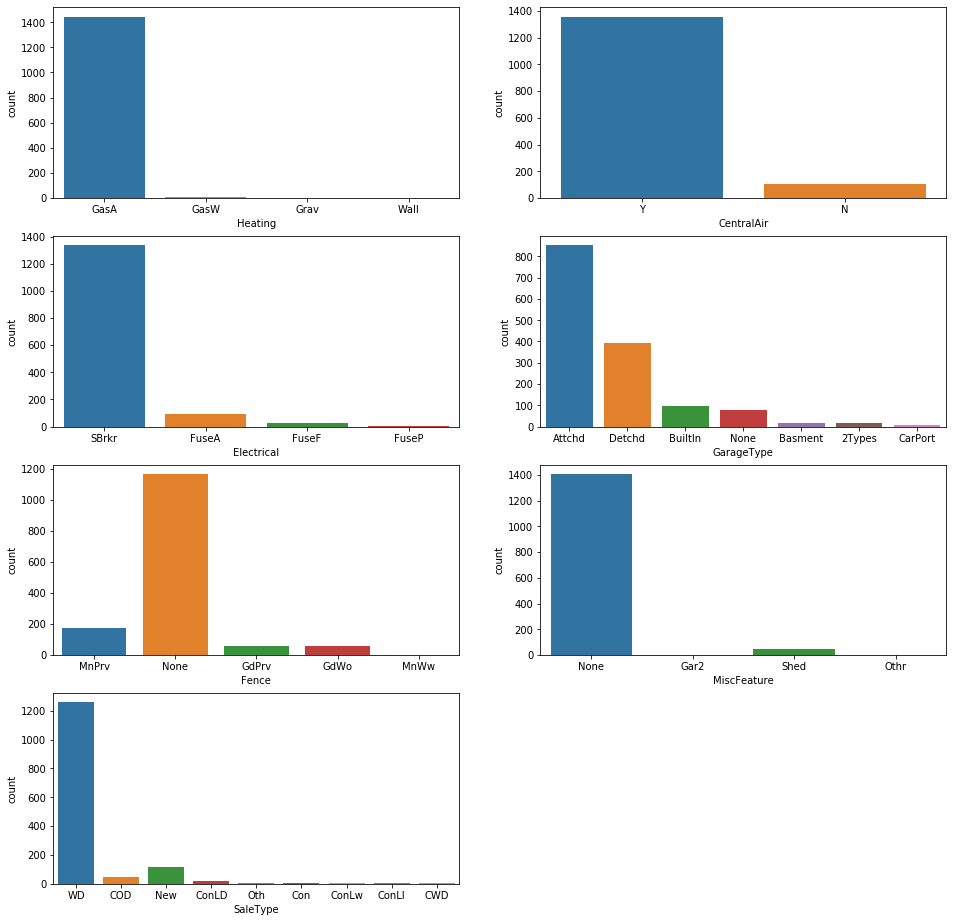

In [0]:
cat_var_only= ['Heating', 'CentralAir', 'Electrical', 'GarageType', 'Fence', 'MiscFeature', 'SaleType' ]  # The categories are strictly category

cat_var_ordinal= ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 
                  'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',  'SaleCondition']

#cat_var_only_eng= ['Bsmt_yes','Heating_Floor_yes', 'Central_Air_yes', 'Electrical_SBrkr_yes', 
                   #'Pool_yes', 'Fence_yes', 'Elev_yes', 'Gar2_yes', 'Shed_yes', 'TenC_yes']


plt.figure(figsize=(16, 75))
for idx, col in enumerate(cat_var_only):
    plt.subplot(18, 2, idx + 1)
    sns.countplot(test_data_cat_var[col])

## Count Plots for Ordinal variable


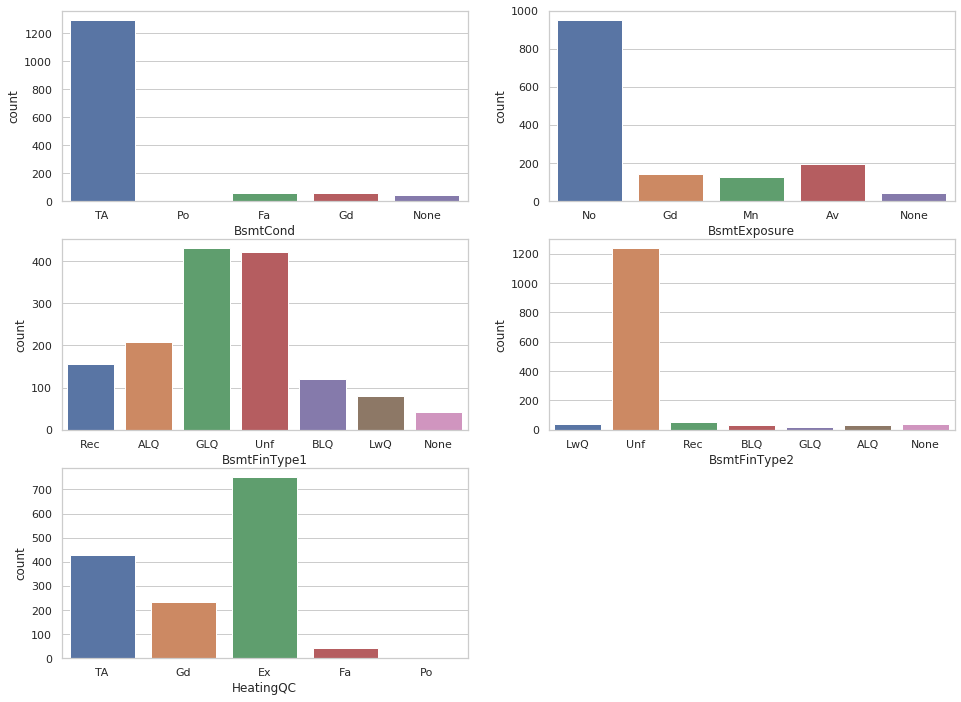

In [87]:
cat_var_ordinal= ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 
                  'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',  'SaleCondition']

sns.set(style="whitegrid")
plt.figure(figsize=(16, 75))
for idx, col in enumerate(cat_var_ordinal[1:6]):
    plt.subplot(18, 2, idx + 1)
    sns.countplot(test_data_cat_var[col])

## Categorical (strictly yes_no, able to do one hot encode) transform Train


In [0]:
# examine the possible variables that are throw away 
cat_only_drop=['Fence', 'MiscFeature', 'SaleType']
train_data_cat_var_final = train_data_cat_var.drop(cat_only_drop, axis=1)

In [0]:
ordinal_drop=['BsmtFinType2','Functional', 'PoolQC', 'GarageCond', 'SaleCondition']
train_data_cat_var_final = train_data_cat_var_final.drop(ordinal_drop, axis=1)

In [182]:
list(train_data_cat_var_final.columns)

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'PavedDrive',
 'SalePrice_log',
 'SalePrice']

In [0]:
train_data_cat_var_final['HasGasHeating'] = pd.Series(len(train_data_cat_var_final['Heating']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasGasHeating'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['Heating']== 'GasA','HasGasHeating'] = 1
train_data_cat_var_final.loc[train_data_cat_var_final['Heating']== 'GasW','HasGasHeating'] = 1

In [0]:
train_data_cat_var_final['HasSBrkr'] = pd.Series(len(train_data_cat_var_final['Electrical']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasSBrkr'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['Electrical']== 'SBrkr','HasSBrkr'] = 1

In [0]:
train_data_cat_var_final['HasEx'] = pd.Series(len(train_data_cat_var_final['BsmtQual']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasEx'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['BsmtQual']== 'Ex','HasEx'] = 1

In [0]:
train_data_cat_var_final['HasGd'] = pd.Series(len(train_data_cat_var_final['BsmtExposure']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasGd'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['BsmtExposure']== 'Gd','HasGd'] = 1

In [0]:
train_data_cat_var_final['HasGLQ'] = pd.Series(len(train_data_cat_var_final['BsmtFinType1']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasGLQ'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['BsmtFinType1']== 'GLQ','HasGLQ'] = 1

In [0]:
train_data_cat_var_final['HasPavedDrive'] = pd.Series(len(train_data_cat_var_final['PavedDrive']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasPavedDrive'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['PavedDrive']== 'Y','HasPavedDrive'] = 1

In [0]:
train_data_cat_var_final['HasTA'] = pd.Series(len(train_data_cat_var_final['GarageQual']), index=train_data_cat_var_final.index)
train_data_cat_var_final['HasTA'] = 0 
train_data_cat_var_final.loc[train_data_cat_var_final['GarageQual']== 'TA','HasTA'] = 1

In [0]:
train_data_cat_var_final.sample(20)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,SalePrice_log,SalePrice,HasGasHeating,HasSBrkr,HasEx,HasGd,HasGLQ,HasPavedDrive
830,TA,TA,No,Rec,GasA,TA,Y,FuseA,TA,Gd,Attchd,RFn,TA,Y,12.019743,166000,1,0,0,0,0,1
878,TA,TA,Av,ALQ,GasA,TA,Y,SBrkr,Gd,None,Detchd,Unf,TA,Y,11.904968,148000,1,1,0,0,0,1
333,Gd,TA,Av,GLQ,GasA,Ex,Y,SBrkr,Gd,Gd,Attchd,RFn,TA,Y,12.240474,207000,1,1,0,0,1,1
880,Ex,Gd,No,ALQ,GasA,Gd,Y,SBrkr,TA,None,Attchd,Fin,TA,Y,11.964001,157000,1,1,1,0,0,1
56,Gd,TA,No,GLQ,GasA,Ex,Y,SBrkr,Gd,None,Attchd,Fin,TA,Y,12.058153,172500,1,1,0,0,1,1
940,TA,TA,Gd,Rec,GasA,TA,Y,SBrkr,TA,None,Attchd,Unf,TA,Y,11.924373,150900,1,1,0,1,0,1
348,Gd,TA,No,GLQ,GasA,Ex,Y,SBrkr,Gd,None,BuiltIn,RFn,TA,Y,11.944708,154000,1,1,0,0,1,1
188,Gd,TA,Av,GLQ,GasA,TA,Y,SBrkr,TA,TA,Detchd,Unf,TA,Y,11.940393,153337,1,1,0,0,1,1
1172,Gd,TA,No,Unf,GasA,Ex,Y,SBrkr,Gd,None,Detchd,Fin,TA,Y,12.054668,171900,1,1,0,0,0,1
631,Gd,Gd,Mn,GLQ,GasA,Ex,Y,SBrkr,Gd,Gd,Attchd,RFn,TA,Y,12.252479,209500,1,1,0,0,1,1


In [0]:
eng_drop=['Heating','Electrical', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'PavedDrive', 'GarageQual']
train_data_cat_var_final = train_data_cat_var_final.drop(eng_drop, axis=1)

In [0]:
def Diff(li1, li2): 
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2] 
    return li_dif 

In [0]:
cols= Diff(list(train_data_cat_var_final.columns),['SalePrice_log', 'SalePrice'])

In [0]:
train_data_cat_var_final = pd.get_dummies(train_data_cat_var_final, prefix=cols, columns=cols, drop_first=True)

In [199]:
train_data_cat_var_final

,SalePrice_log,SalePrice,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,HasGasHeating_1,HasSBrkr_1,HasEx_1,HasGd_1,HasGLQ_1,HasPavedDrive_1,HasTA_1
0,12.247694,208500,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1
1,12.109011,181500,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1
2,12.317167,223500,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1
3,11.849398,140000,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1
4,12.429216,250000,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072541,175000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1
1456,12.254863,210000,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1
1457,12.493130,266500,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1
1458,11.864462,142125,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1


In [200]:
train_data_cat_var_final.shape

(1460, 35)

In [0]:
train_data_cat_var_final.to_csv('train1.csv')

## Categorical transform_test


In [0]:
# examine the possible variables that are throw away 
cat_only_drop=['Fence', 'MiscFeature', 'SaleType']
test_data_cat_var_final = test_data_cat_var.drop(cat_only_drop, axis=1)

In [0]:
ordinal_drop=['BsmtFinType2','Functional', 'PoolQC', 'GarageCond', 'SaleCondition']
test_data_cat_var_final = test_data_cat_var_final.drop(ordinal_drop, axis=1)

In [162]:
list(test_data_cat_var_final.columns)

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'PavedDrive']

In [0]:
test_data_cat_var_final['HasGasHeating'] = pd.Series(len(test_data_cat_var_final['Heating']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasGasHeating'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['Heating']== 'GasA','HasGasHeating'] = 1
test_data_cat_var_final.loc[test_data_cat_var_final['Heating']== 'GasW','HasGasHeating'] = 1

In [0]:
test_data_cat_var_final['HasSBrkr'] = pd.Series(len(test_data_cat_var_final['Electrical']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasSBrkr'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['Electrical']== 'SBrkr','HasSBrkr'] = 1

In [0]:
test_data_cat_var_final['HasEx'] = pd.Series(len(test_data_cat_var_final['BsmtQual']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasEx'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['BsmtQual']== 'Ex','HasEx'] = 1

In [0]:
test_data_cat_var_final['HasGd'] = pd.Series(len(test_data_cat_var_final['BsmtExposure']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasGd'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['BsmtExposure']== 'Gd','HasGd'] = 1

In [0]:
test_data_cat_var_final['HasGLQ'] = pd.Series(len(test_data_cat_var_final['BsmtFinType1']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasGLQ'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['BsmtFinType1']== 'GLQ','HasGLQ'] = 1

In [0]:
test_data_cat_var_final['HasPavedDrive'] = pd.Series(len(test_data_cat_var_final['PavedDrive']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasPavedDrive'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['PavedDrive']== 'Y','HasPavedDrive'] = 1

In [0]:
test_data_cat_var_final['HasTA'] = pd.Series(len(test_data_cat_var_final['GarageQual']), index=test_data_cat_var_final.index)
test_data_cat_var_final['HasTA'] = 0 
test_data_cat_var_final.loc[test_data_cat_var_final['GarageQual']== 'TA','HasTA'] = 1

In [170]:
test_data_cat_var_final.sample(10)  

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,HasGasHeating,HasSBrkr,HasEx,HasGd,HasGLQ,HasPavedDrive,HasTA
1244,TA,TA,No,Rec,GasA,TA,Y,SBrkr,TA,None,Attchd,Unf,TA,Y,1,1,0,0,0,1,1
1410,TA,TA,No,Unf,GasA,TA,N,SBrkr,TA,Gd,None,None,None,N,1,1,0,0,0,0,0
1028,TA,TA,No,Rec,GasA,TA,Y,SBrkr,Gd,TA,Attchd,Unf,TA,Y,1,1,0,0,0,1,1
946,TA,TA,No,GLQ,GasA,Ex,Y,SBrkr,Fa,None,Detchd,Unf,TA,Y,1,1,0,0,1,1,1
1317,TA,TA,No,Unf,GasA,TA,N,SBrkr,Gd,Po,Detchd,Unf,Fa,N,1,1,0,0,0,0,0
394,Gd,TA,Av,Rec,GasA,Gd,Y,SBrkr,Gd,Po,Attchd,Unf,TA,Y,1,1,0,0,0,1,1
98,TA,TA,No,Rec,GasW,TA,N,SBrkr,TA,None,None,None,None,N,1,1,0,0,0,0,0
643,TA,TA,No,Rec,GasA,TA,Y,FuseP,TA,None,2Types,Unf,TA,Y,1,0,0,0,0,1,1
90,Fa,Fa,No,ALQ,GasA,TA,Y,SBrkr,TA,Gd,Detchd,Unf,TA,Y,1,1,0,0,0,1,1
1183,TA,TA,No,LwQ,GasA,Gd,Y,SBrkr,Gd,Fa,Attchd,Unf,TA,Y,1,1,0,0,0,1,1


In [0]:
eng_drop=['Heating','Electrical', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'PavedDrive', 'GarageQual']
test_data_cat_var_final = test_data_cat_var_final.drop(eng_drop, axis=1)

In [0]:
def Diff(li1, li2): 
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2] 
    return li_dif 

In [0]:
cols= Diff(list(test_data_cat_var_final.columns),['HasGasHeating', 'HasSBrkr', 'HasEx', 'HasGd', 'HasGLQ',
       'HasPavedDrive', 'HasTA'])

In [0]:
test_data_cat_var_final= pd.get_dummies(test_data_cat_var_final, prefix=cols, columns=cols, drop_first=True)

In [175]:
for col in cols: 
  if len(list(train_data_cat_var[col].value_counts().index))==len(list(test_data_cat_var[col].value_counts().index)):
    print ('same')
  else:
    print(col)

same
same
same
same
same
same
same


In [176]:
test_data_cat_var_final.shape

(1459, 33)

In [177]:
list(test_data_cat_var_final.columns)

['HasGasHeating',
 'HasSBrkr',
 'HasEx',
 'HasGd',
 'HasGLQ',
 'HasPavedDrive',
 'HasTA',
 'BsmtCond_Gd',
 'BsmtCond_None',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_Po',
 'HeatingQC_TA',
 'CentralAir_Y',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'FireplaceQu_Fa',
 'FireplaceQu_Gd',
 'FireplaceQu_None',
 'FireplaceQu_Po',
 'FireplaceQu_TA',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageType_None',
 'GarageFinish_None',
 'GarageFinish_RFn',
 'GarageFinish_Unf']

In [0]:
test_data_cat_var_final.to_csv('test1.csv')

#Kailun Section OLD

##Load Data and Import Libs

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
#import os 

In [0]:
#datadir = r'/content/gdrive/My Drive/Data Science Bootcamp 2019/Housing_Project'

In [0]:
filename= r'train.csv'
train_data = pd.read_csv(filename)

In [0]:
cd /content/

/content


In [0]:
ls

gdrive/  sample_data/  test.csv  train.csv


##Examine Data (Looks like IOWA)

In [0]:
train_data.drop("Id", 1, inplace=True)  # remove ID column because useless
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
train_data['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

## Kailun Data Description 


BsmtCond: Evaluates the general condition of the basement   

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

KitchenAbvGr: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		



## Response Variable



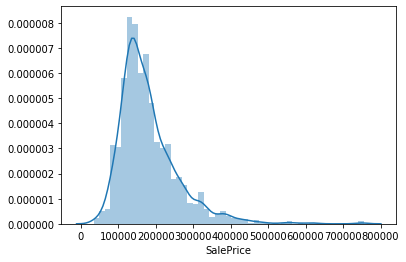

In [0]:
sns.distplot(train_data['SalePrice'])

visualize the log transform of the response variable.  Log transform able to normalize the response variable 

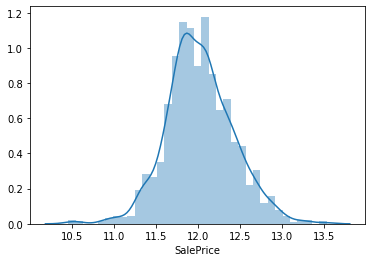

In [0]:
sns.distplot(np.log(train_data['SalePrice']))

In [0]:
train_data['SalePrice_log']= np.log(train_data['SalePrice'])

## Continuous Indep Variables 



In [0]:
cont_var= ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
           'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SalePrice']


In [0]:
train_data_cont_var= pd.DataFrame(train_data, columns=cont_var)

In [0]:
train_data_cont_var.head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,SalePrice
0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,208500
1,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,181500
2,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,223500
3,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,140000
4,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,250000


In [0]:
train_data_cont_var.info() 
# We observe no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
BsmtFinSF1      1460 non-null int64
BsmtFinSF2      1460 non-null int64
BsmtUnfSF       1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
LowQualFinSF    1460 non-null int64
GrLivArea       1460 non-null int64
BsmtFullBath    1460 non-null int64
BsmtHalfBath    1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
KitchenAbvGr    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(16)
memory usage: 182.6 KB


### Univariate Histograms (Make sure to adjust the bins)  SKEWNESS? 

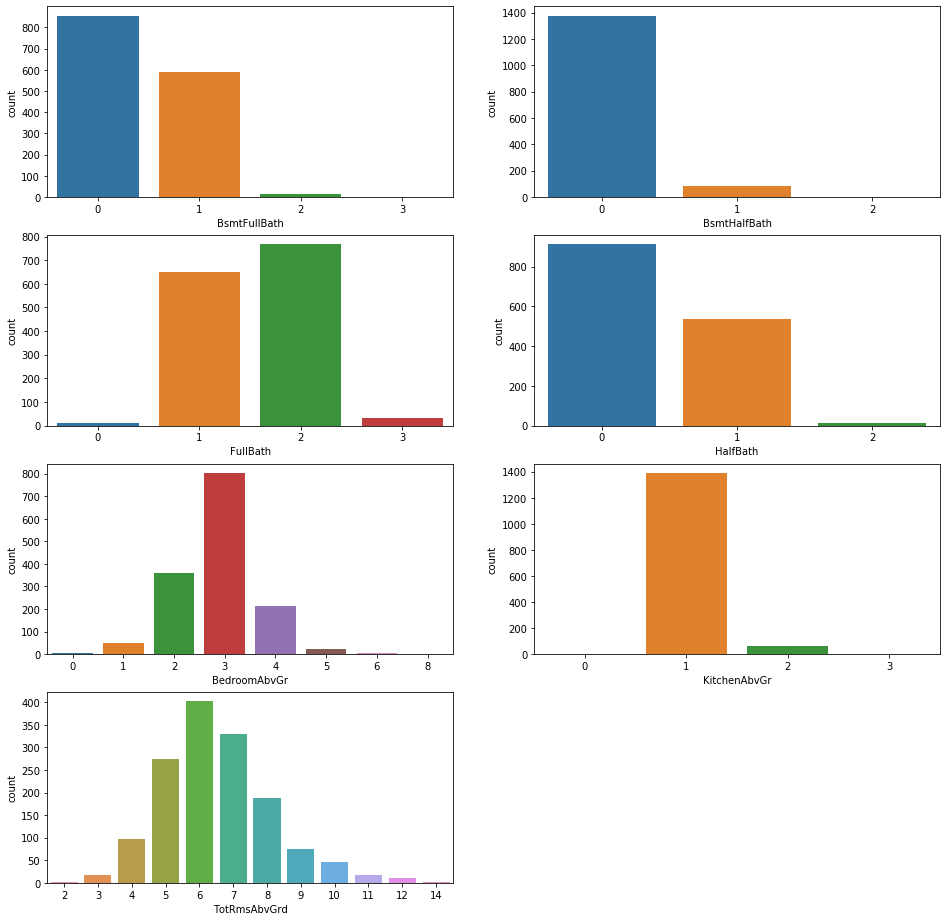

In [0]:
cont_var_plot= [ 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']
plt.figure(figsize=(16, 75))
for idx, col in enumerate(cont_var_plot):
    plt.subplot(18, 2, idx + 1)
    sns.countplot(train_data_cont_var[col])

In [0]:
cont_var_plot_hist= ['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']

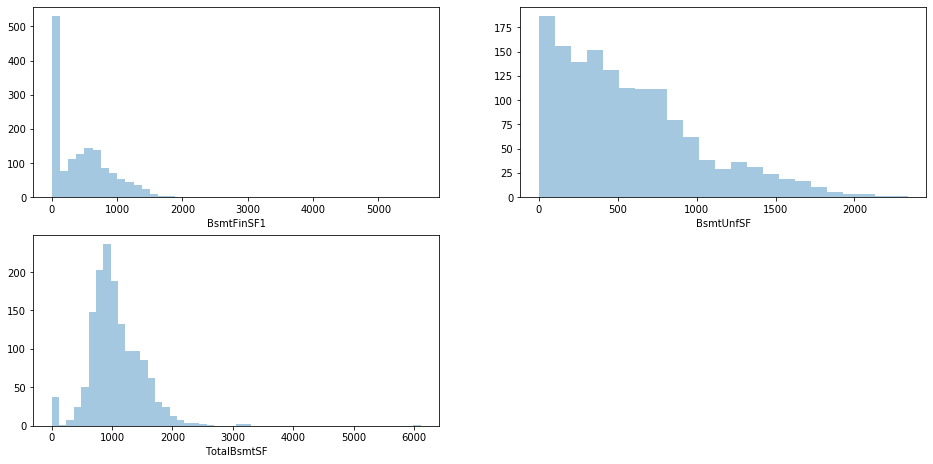

In [0]:
#sns.distplot(train_data['TotalBsmtSF'])
plt.figure(figsize=(16, 75))
for idx, col in enumerate(['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF']):
    plt.subplot(18, 2, idx + 1)
    sns.distplot(train_data[col], kde=False)

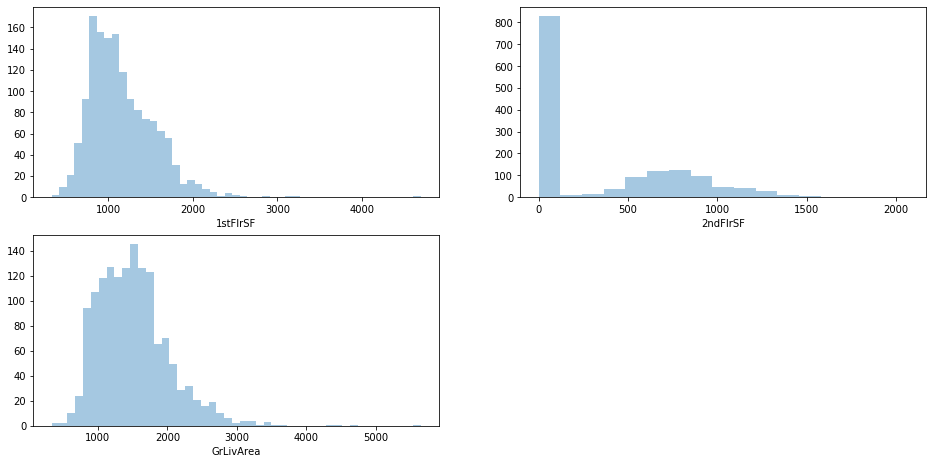

In [0]:
plt.figure(figsize=(16, 75))
for idx, col in enumerate(['1stFlrSF', '2ndFlrSF', 'GrLivArea']):
    plt.subplot(18, 2, idx + 1)
    sns.distplot(train_data[col], kde=False)

In [0]:
# examine the possible variables that are throw away 
discard_col= ['BsmtFinSF2', 'LowQualFinSF']

### Description (quartiles)

In [0]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Outliers? 

For normal distribution, mean should equal to the median 

### Bivariate Relationships (with Response Variable and with each MULTICOLLINEARITY?)

In [0]:
discard_col= ['BsmtFinSF2', 'LowQualFinSF']
final_cont_var= ['TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice_log']
train_data_cont_final= pd.DataFrame(train_data, columns=final_cont_var)

#### Scatterplots

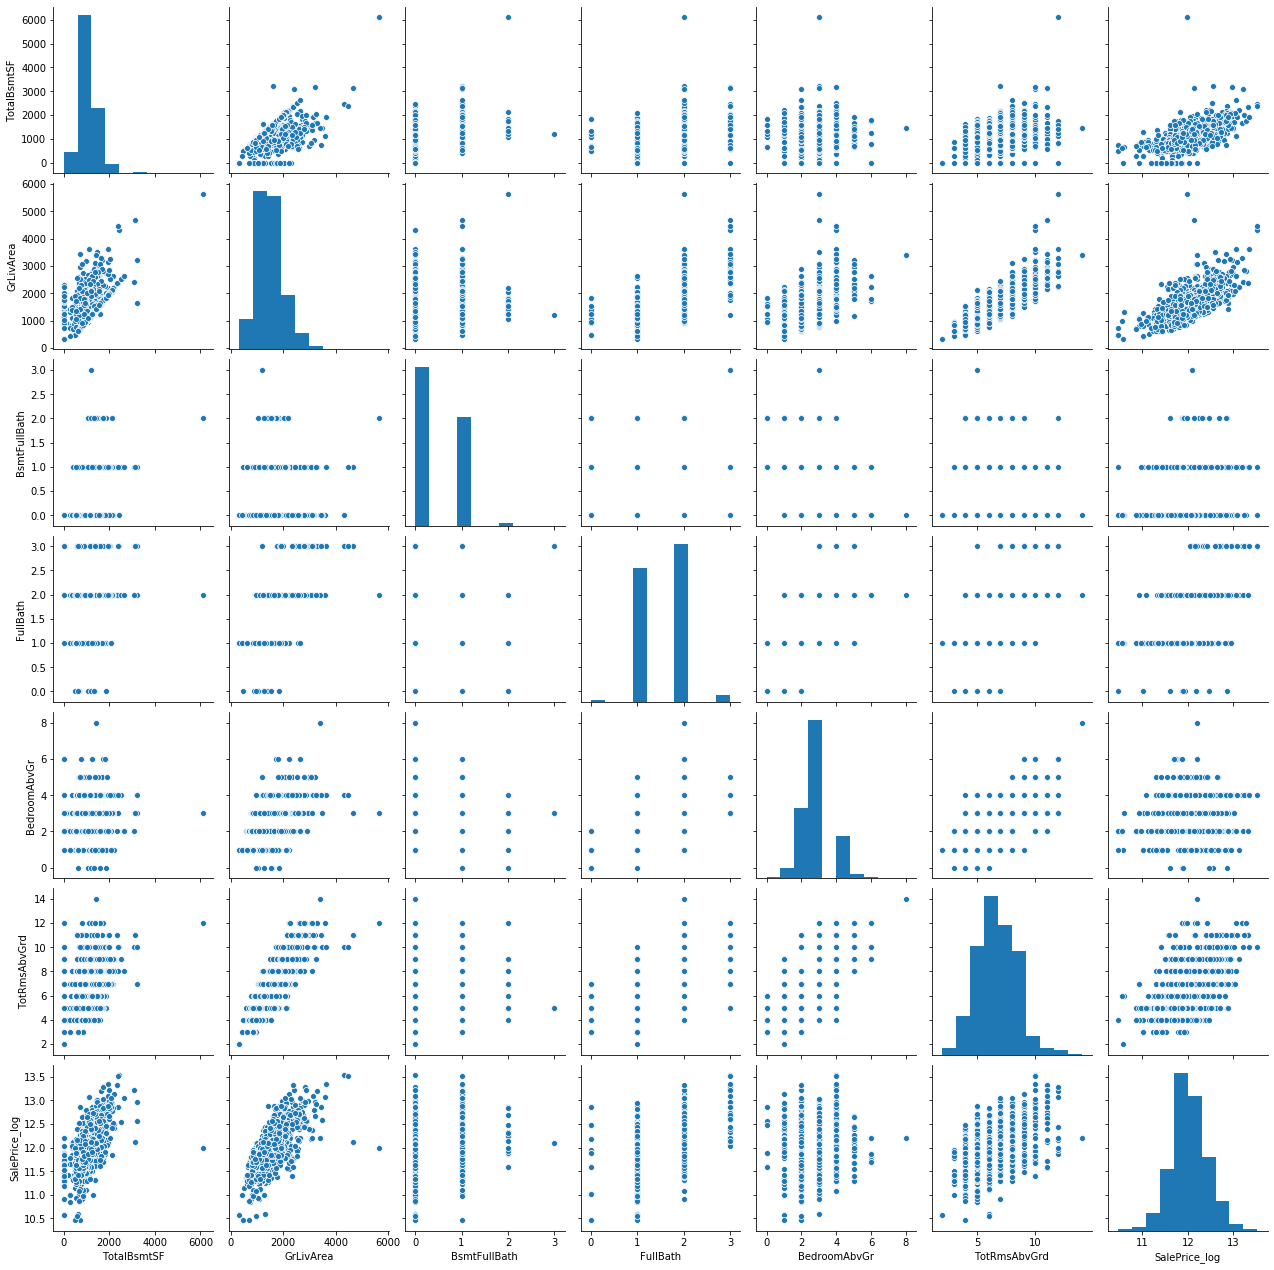

In [0]:
sns.pairplot(train_data_cont_final)

### Correlation Matrix with Response Variable (heat maps)

### Possible Ways to Feature Engineer 

In [0]:
#Ideas to Combine 
BsmtFinSF1+ BsmtUnfSF= TotalBsmtSF #Keep TotBsmtSF only, while make a categorical variable that's an indicator of finished or not 
Bsmt_Fin*= 1 if BsmentFinSF > 75% of total TotalBsmtSF? 
or have BsmtFin_percent*?

BsmtFullBath+ BsmtHalfBath/2= Total_BsmtBath
FullBath+HalfBath/2= Total_Bath
Total_BsmtBath+Total_Bath= Total_Bath*

1stFlrSF should ~ 2ndFlrSF  (get rid of both) have GrLivArea for both 
if 2ndFlrSF==0, Num_floors* = 1 

KitchenAbvGr>2, Kitchen_2*== 1 else 0 

## Categorical Indep Variables


In [0]:
cat_var= ["Heating", "CentralAir", "Electrical"]
discrete_num_var=['HeatingQC', 'KitchenQual' ] # transform into numerical data 

### Bar graphs showing mean of the cat and count/proportions

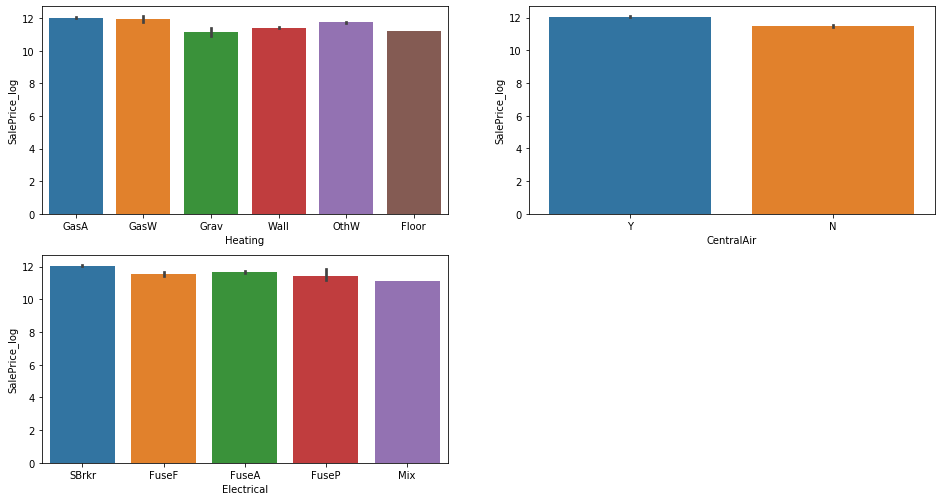

In [0]:
plt.figure(figsize=(16, 100))
for idx, col in enumerate(cat_var):
    plt.subplot(22, 2, idx + 1)
    sns.barplot(x=train_data[col], y=train_data["SalePrice_log"])
    plt.ylabel("SalePrice_log")
    plt.xlabel(col)

Based on the barplot of the means of response variable for each category, means looks very similar.  However the counts/ proportions of each category is unbalanced. 

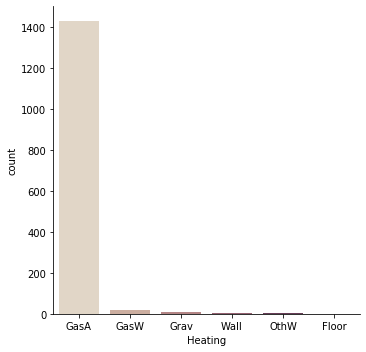

In [0]:
sns.catplot(x=cat_var[0], kind="count", palette="ch:.25", data=train_data)

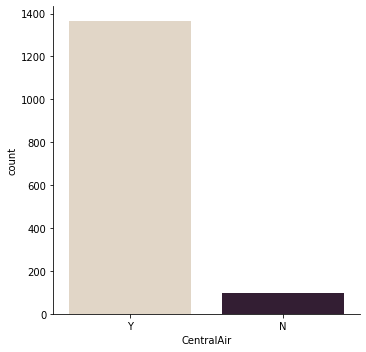

In [0]:
sns.catplot(x="CentralAir", kind="count", palette="ch:.25", data=train_data)

### Boxplots showing distribution within each category

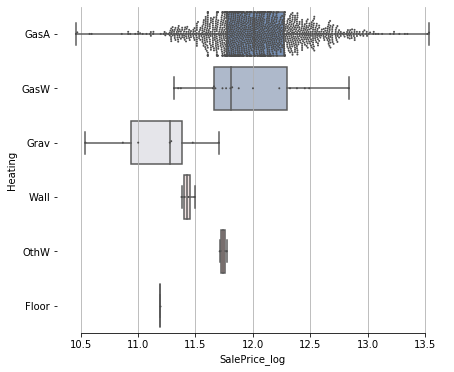

In [0]:
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="SalePrice_log", y="Heating", data=train_data,
            whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="SalePrice_log", y="Heating", data=train_data,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Heating")
sns.despine(trim=True, left=True)

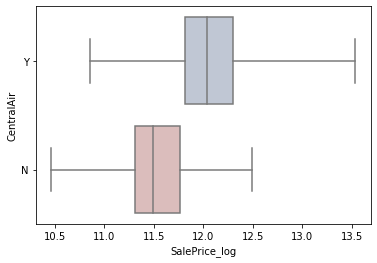

In [0]:
sns.boxplot(x="SalePrice_log", y="CentralAir", data=train_data,
            whis="range", palette="vlag")

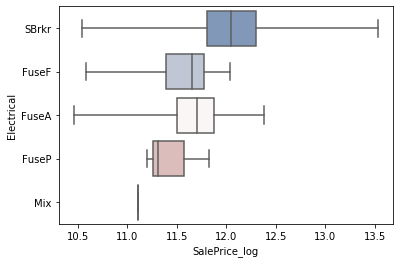

In [0]:
sns.boxplot(x="SalePrice_log", y="Electrical", data=train_data,
            whis="range", palette="vlag")

### Categorical (strictly yes_no, able to do one hot encode)

In [0]:
cat_var= ['Heating', 'CentralAir', 'Electrical']

### Bar graphs showing mean of the cat and count/proportions ordinal 

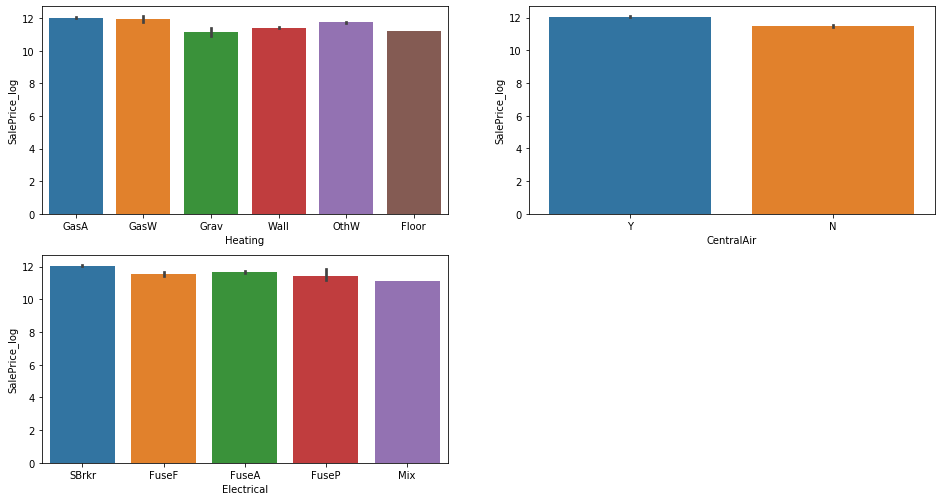

In [0]:

plt.figure(figsize=(16, 100))
for idx, col in enumerate(cat_var):
    plt.subplot(22, 2, idx + 1)
    sns.barplot(x=train_data[col], y=train_data["SalePrice_log"])
    plt.ylabel("SalePrice_log")
    plt.xlabel(col)

Based on the barplot of the means of response variable for each category, means looks very similar.  However the counts/ proportions of each category is unbalanced. 

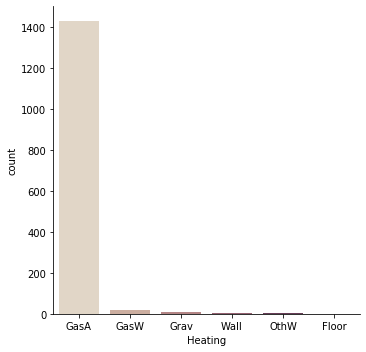

In [0]:
sns.catplot(x=cat_var[0], kind="count", palette="ch:.25", data=train_data)

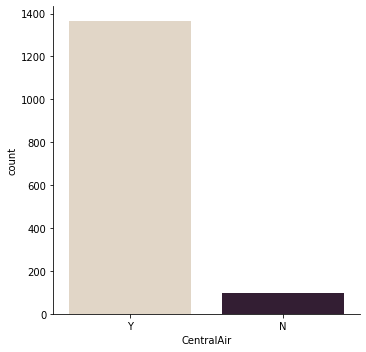

In [0]:
sns.catplot(x="CentralAir", kind="count", palette="ch:.25", data=train_data)

### Ordinal Discrete Numerical(has ordered levels, need to transform into meaningfull intervals???) 

In [0]:
discrete_num_var=['HeatingQC', 'KitchenQual' ] # transform into numerical data 

# Questions for Alex 

variables we can change?  

feature selection? testing dataset drop 



